- 원-핫 인코딩(One-Hot Encoding)  
- 선택해야 하는 선택지의 개수만큼의 차원을 가지면서, 각 선택지의 인덱스에 해당하는 원소에는 1, 나머지 원소는 0의 값을 가지도록 하는 표현 방법
- 원-핫 인코딩으로 표현된 벡터 : 원-핫 벡터(one-hot vector)
- 강아지, 고양이, 냉장고라는 3개의 선택지에 대해서 원-핫 인코딩 된 벡터  
강아지 = [1, 0, 0]  
고양이 = [0, 1, 0]  
냉장고 = [0, 0, 1]  

소프트맥스 함수(Softmax function)  
- 분류해야하는 정답지(클래스)의 총 개수를 k라고 할 때, k차원의 벡터를 입력받아 각 클래스에 대한 확률을 추정  
- 분류하고자 하는 클래스가 k개일 때, k차원의 벡터를 입력받아서 모든 벡터 원소의 값을 0과 1사이의 값으로 값을 변경하여 다시 k차원의 벡터를 리턴  
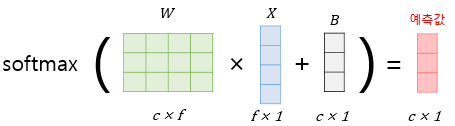  

- 전체 샘플 개수 5개, 특성 4개 이므로 5x4 행렬 X로 정의함
- 이번 문제에서 선택지가 총 3개인 문제이므로 가설의 예측값으로 얻는 행렬 $\hat{Y}$의 열의 개수는 3개여야 함  
    - 각 행은 행렬 X의 각 행의 예측값이므로 행의 크기(5x3)는 동일해야 함
- 크기 5 × 3의 행렬 $\hat{Y}$는 크기 5 × 4 입력 행렬 X와 가중치 행렬 W의 곱으로 얻어지는 행렬이므로 가중치 행렬 W의 크기는 추정을 통해 4 × 3의 크기를 가진 행렬임
    - 차원을 축소하는 방법이 $\hat{Y}$의 차원수만큼 결과 값이 나오도록 가중치 곱을 진행
- 편향 행렬 B는 예측값 행렬 $\hat{Y}$와 크기가 동일해야 하므로 5 x 3의 크기를 가짐  
  
$\hat{Y} = softmax(XW + B)$

$ 
\begin{pmatrix}
y_{11} & y_{12} & y_{13} \\ y_{21} & y_{22} & y_{23} \\ y_{31} & y_{32} & y_{33} \\ y_{41} & y_{42} & y_{43} \\ y_{51} & y_{52} & y_{53}
\end{pmatrix} = softmax
\begin{pmatrix}\begin{pmatrix}
x_{11} & x_{12} & x_{13} & x_{14} \\ x_{21} & x_{22} & x_{23} & x_{24} \\ x_{31} & x_{32} & x_{33} & x_{34} \\ x_{41} & x_{42} & x_{43} & x_{44} \\ x_{51} & x_{52} & x_{53} & x_{54}
\end{pmatrix} 
\begin{pmatrix} w_{11} & w_{12} & w_{13} \\ w_{21} & w_{22} & w_{23} \\ w_{31} & w_{32} & w_{33} \\ w_{41} & w_{42} & w_{43} 
\end{pmatrix} + \begin{pmatrix}
b_{1} & b_{2} & b_{3} \\ b_{1} & b_{2} & b_{3} \\ b_{1} & b_{2} & b_{3} \\ b_{1} & b_{2} & b_{3} \\ b_{1} & b_{2} & b_{3}
\end{pmatrix} 
\end{pmatrix}$


비용 함수  
- 소프트맥스 회귀에서는 비용 함수로 크로스 엔트로피 함수를 사용

In [1]:
import torch
import torch.nn.functional as F

torch.manual_seed(1)

In [8]:
# 파이토치로 소프트맥스의 비용 함수 구현하기 (로우-레벨)
z = torch.FloatTensor([1, 2, 3])
hypothesis = F.softmax(z, dim=0)
print(hypothesis)

# 이 원소들의 값의 합이 1인지 확인
print(hypothesis.sum())

tensor([0.0900, 0.2447, 0.6652])
tensor(1.)


In [9]:
# 3 × 5 행렬
z = torch.rand(3, 5, requires_grad=True)
print(z)
# 각 샘플에 대해서 소프트맥스 함수를 적용 하므로 두번째 차원에 대해서 소프트맥스 함수를 적용한다는 의미
hypothesis = F.softmax(z, dim=1)
print(hypothesis)

tensor([[0.6397, 0.9743, 0.8300, 0.0444, 0.0246],
        [0.2588, 0.9391, 0.4167, 0.7140, 0.2676],
        [0.9906, 0.2885, 0.8750, 0.5059, 0.2366]], requires_grad=True)
tensor([[0.2128, 0.2974, 0.2574, 0.1173, 0.1150],
        [0.1486, 0.2933, 0.1740, 0.2342, 0.1499],
        [0.2880, 0.1427, 0.2565, 0.1774, 0.1355]], grad_fn=<SoftmaxBackward0>)


In [38]:
# scatter_ 사용법

src = torch.arange(1, 11).reshape((2, 5))
# tensor([[ 1,  2,  3,  4,  5],
#        [ 6,  7,  8,  9, 10]])
a = torch.zeros(3, 5, dtype=src.dtype)
index = torch.tensor([[1, 1, 2, 0, 2]])
# dim=0 이면 행 방향(아래)로 인덱스에 맞게 바뀜
# index 텐서가 행 하나에 5개 원소이므로 1, 2, 3, 4, 5가 순서대로 들어감
# index 첫번째가 1이면 a의 두번째 행에 1이 들어감
# index 두번째가 1이면 a의 두번째 행에 2가 들어감
# index 세번째가 2면 a의 세번째 행에 3이 들어감
# index 네번째가 0이면 a의 첫번째 행에 4가 들어감
# index 다섯번째가 2면 a의 두번째 행에 5가 들어감
a.scatter_(0, index, src)

tensor([[0, 0, 0, 4, 0],
        [1, 2, 0, 0, 0],
        [0, 0, 3, 0, 5]])

In [41]:
src = torch.arange(1, 11).reshape((2, 5))
print(src)
# tensor([[ 1,  2,  3,  4,  5],
#         [ 6,  7,  8,  9, 10]])

index = torch.tensor([[0, 1, 2],  # 0번째 행에 1, 2, 3이 들어감
                      [0, 1, 4]]) # 1번째 행에 6, 7, 8이 들어감
# dim 이 1이니까 -> 으로 정해진 인덱스에 입력됨
# index 첫번째 행이 0, 1, 2 니까 첫번째 행에 0, 1, 2 열에 맞게 값들이 순서대로 들어감
# index 두번째 행이 0, 1, 4 니까 두번째 행에 0, 1, 4 열에 src의 값들이 순서대로 들어감
# index 세번째가 없으므로 src 세번째 행에는 아무것도 안들어감
torch.zeros(3, 5, dtype=src.dtype).scatter_(1, index, src)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


tensor([[1, 2, 3, 0, 0],
        [6, 7, 0, 0, 8],
        [0, 0, 0, 0, 0]])

In [45]:
y = torch.randint(5, (3,)).long()
# tensor([1, 3, 1])

# 모든 원소가 0인 3x5 텐서 생성
y_one_hot = torch.zeros_like(hypothesis)
# tensor([[0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.],
#         [0., 0., 0., 0., 0.]])

print(y.unsqueeze(1)) # y.unsqueeze(1) : (3,) -> 3x1
# tensor([[1],
#         [3],
#         [1]])

# dim 이 1이므로 열방향(->)에 값을 넣음. src 인자가 1이므로 1로 채움
# index 가 1, 3, 1 이므로 y_one_hot의 첫번째 행은 두번째(1) 열에 1 채움
# 두번째 행은 네번째(3) 열에 1 채움
# 세번째 행은 두번째(1) 열에 1 채움
y_one_hot.scatter_(1, y.unsqueeze(1), 1)

tensor([1, 3, 1])
tensor([[1],
        [3],
        [1]])


tensor([[0., 1., 0., 0., 0.],
        [0., 0., 0., 1., 0.],
        [0., 1., 0., 0., 0.]])

In [56]:
# 비용함수
cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
print(cost)

tensor(1.5371, grad_fn=<MeanBackward0>)


파이토치로 소프트맥스의 비용 함수 구현하기 (하이-레벨)

In [57]:
# F.softmax() + torch.log() = F.log_softmax()

# low level
torch.log(F.softmax(z, dim=1))

# high level
F.log_softmax(z, dim=1)

tensor([[-1.5474, -1.2128, -1.3570, -2.1426, -2.1624],
        [-1.9067, -1.2264, -1.7488, -1.4515, -1.8979],
        [-1.2449, -1.9471, -1.3606, -1.7296, -1.9989]],
       grad_fn=<LogSoftmaxBackward0>)

In [59]:
# F.log_softmax() + F.nll_loss() = F.cross_entropy()

# Low level
# 첫번째 수식
(y_one_hot * -torch.log(F.softmax(z, dim=1))).sum(dim=1).mean()
# 두번째 수식
(y_one_hot * - F.log_softmax(z, dim=1)).sum(dim=1).mean()

# High level
# 세번째 수식
# nll = Negative Log Likelihood
F.nll_loss(F.log_softmax(z, dim=1), y)

# 네번째 수식
F.cross_entropy(z, y)

tensor(1.5371, grad_fn=<NllLossBackward0>)

In [60]:
# 소프트맥스 회귀 구현
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

In [66]:
x_train = [[1, 2, 1, 1],
           [2, 1, 3, 2],
           [3, 1, 3, 4],
           [4, 1, 5, 5],
           [1, 7, 5, 5],
           [1, 2, 5, 6],
           [1, 6, 6, 6],
           [1, 7, 7, 7]]
y_train = [2, 2, 2, 1, 1, 1, 0, 0]
x_train = torch.FloatTensor(x_train)
y_train = torch.LongTensor(y_train)

print('x_train:', x_train.shape)
print('y_train:', y_train.shape)

# 최종 사용할 레이블은 원핫 인코딩을 해야함
# 클래스 개수는 3개이므로 y_train에 원핫 인코딩을 하면 8x3이 되어야 함
y_one_hot = torch.zeros(8, 3)
y_one_hot.scatter_(1, y_train.unsqueeze(1), 1)
print('y_one_hot:', y_one_hot.shape) # 8x3

# 모델 초기화
W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # 가설
    hypothesis = F.softmax(x_train.matmul(W) + b, dim=1) 
    # 비용 함수
    cost = (y_one_hot * -torch.log(hypothesis)).sum(dim=1).mean()
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

x_train: torch.Size([8, 4])
y_train: torch.Size([8])
y_one_hot: torch.Size([8, 3])
Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [67]:
# high level

W = torch.zeros((4, 3), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
# optimizer 설정
optimizer = optim.SGD([W, b], lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # Cost 계산
    z = x_train.matmul(W) + b
    cost = F.cross_entropy(z, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 100번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.098612
Epoch  100/1000 Cost: 0.761050
Epoch  200/1000 Cost: 0.689991
Epoch  300/1000 Cost: 0.643229
Epoch  400/1000 Cost: 0.604117
Epoch  500/1000 Cost: 0.568255
Epoch  600/1000 Cost: 0.533922
Epoch  700/1000 Cost: 0.500291
Epoch  800/1000 Cost: 0.466908
Epoch  900/1000 Cost: 0.433507
Epoch 1000/1000 Cost: 0.399962


In [68]:
# 소프트맥스 회귀 클래스로 구현하기

class SoftmaxClassifierModel(nn.Module):
    def __init__(self):
        super().__init__()
        # 4개의 특성을 가지고 3개의 클래스로 분류하기 때문에 output_dim=3.
        # input_dim=4, output_dim=3.
        self.linear = nn.Linear(4, 3)

    def forward(self, x):
        return self.linear(x)
    
model = SoftmaxClassifierModel()

# optimizer 설정
optimizer = optim.SGD(model.parameters(), lr=0.1)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    # H(x) 계산
    prediction = model(x_train)
    # cost 계산
    cost = F.cross_entropy(prediction, y_train)
    # cost로 H(x) 개선
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    # 20번마다 로그 출력
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(epoch, nb_epochs, cost.item()))

Epoch    0/1000 Cost: 1.616785
Epoch  100/1000 Cost: 0.658891
Epoch  200/1000 Cost: 0.573443
Epoch  300/1000 Cost: 0.518151
Epoch  400/1000 Cost: 0.473265
Epoch  500/1000 Cost: 0.433516
Epoch  600/1000 Cost: 0.396563
Epoch  700/1000 Cost: 0.360914
Epoch  800/1000 Cost: 0.325392
Epoch  900/1000 Cost: 0.289178
Epoch 1000/1000 Cost: 0.254148


소프트맥스 회귀로 MNIST 데이터 분류하기

In [69]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import matplotlib.pyplot as plt
import random

In [71]:
USE_CUDA = torch.cuda.is_available()
device = torch.device("cuda" if USE_CUDA else "cpu")
device

device(type='cuda')

In [72]:
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

In [73]:
# hyperparameters
training_epochs = 15
batch_size = 100

In [74]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST_data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST_data/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST_data/MNIST/raw



In [75]:
# dataset loader
data_loader = DataLoader(
    dataset=mnist_train,
    batch_size=batch_size, # 배치 크기는 100
    shuffle=True,
    drop_last=True)

# drop_last=True 는 1000개 데이터에서 배치 크기가 128일때 총7개가 나오고 마지막은
# 104개가 남음. 이 마지막 배치를 그냥 버릴 때 사용함. 이는 다른 배치보다 개수가 적은
# 마지막 배치를 경사 하강법에 사용하여 마지막 배치가 상대적으로 과대 평가되는 현상을
# 막아줌.

In [76]:
# MNIST data image of shape 28 * 28 = 784
linear = nn.Linear(784, 10, bias=True).to(device)

In [77]:
# 비용 함수와 옵티마이저 정의
criterion = nn.CrossEntropyLoss().to(device) # 내부적으로 소프트맥스 함수를 포함하고 있음.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [78]:
for epoch in range(training_epochs): # 앞서 training_epochs의 값은 15로 지정함
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # 배치 크기가 100이므로 아래의 연산에서 X는 (100, 784)의 텐서가 됨
        # 입력 이미지를 [batch_size × 784]의 크기로 reshape
        X = X.view(-1, 28 * 28).to(device)
        # 레이블은 원-핫 인코딩이 된 상태가 아니라 0 ~ 9의 정수
        Y = Y.to(device)

        optimizer.zero_grad()
        hypothesis = linear(X)
        cost = criterion(hypothesis, Y)
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535150588
Epoch: 0002 cost = 0.359577715
Epoch: 0003 cost = 0.331264287
Epoch: 0004 cost = 0.316404670
Epoch: 0005 cost = 0.307106972
Epoch: 0006 cost = 0.300456554
Epoch: 0007 cost = 0.294933438
Epoch: 0008 cost = 0.290956199
Epoch: 0009 cost = 0.287074119
Epoch: 0010 cost = 0.284515619
Epoch: 0011 cost = 0.281914055
Epoch: 0012 cost = 0.279526889
Epoch: 0013 cost = 0.277636588
Epoch: 0014 cost = 0.275874794
Epoch: 0015 cost = 0.274422765
Learning finished


Accuracy: 0.8883000016212463
Label:  8
Prediction:  3


/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/opt/conda/lib/python3.9/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


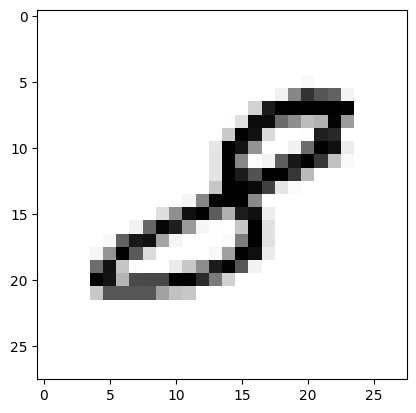

In [79]:
# 테스트 데이터를 사용하여 모델 테스트

# torch.no_grad()를 하면 gradient 계산을 수행하지 않음
with torch.no_grad():
    X_test = mnist_test.test_data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.test_labels.to(device)

    prediction = linear(X_test)
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # MNIST 테스트 데이터에서 무작위로 하나를 뽑아서 예측
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.test_data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.test_labels[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())

    plt.imshow(mnist_test.test_data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()